In [27]:
# Imports
import sunpy.map
from sunpy.coordinates import frames
from sunpy.coordinates import Heliocentric

import astropy.units as u
from astropy.coordinates import SkyCoord
import astropy.constants as const

import matplotlib.pyplot as plt


In [28]:
# Construct aia / stereo sunpy maps from fits
aia_map = sunpy.map.Map("./observations/aia_lev1_171a_2012_07_19t10_14_11_34z_image_lev1.fits") 
stereo_map = sunpy.map.Map("./observations/20120719_101400_n4eua.fts") 


In [29]:
# Extracting data from the map
time = aia_map.reference_coordinate.obstime         # Time of Observation
distance = aia_map.reference_coordinate.distance    # Distance from the observer to the Sun (1?)
observer = aia_map.reference_coordinate.observer    # Observer location (HGS)

# Define loop coordinates in hgs frame
r_1 = const.R_sun   # Solar radius
lat = -14*u.deg     # Latitude of loop in hgs
lon = 91*u.deg      # Longitude of loop in hgs

# Define various frames
hgs_frame = frames.HeliographicStonyhurst(obstime=time)     # Heliographic Stonyhurst frame
hcc_frame = Heliocentric(observer=observer, obstime=time)   # Heliocentric frame
hce_frame = frames.HeliocentricEarthEcliptic(obstime=time)  # Heliocentric Earth Ecliptic frame
hpj_frame = frames.Helioprojective(obstime=time,            # Helioprojective frame
                                   observer=observer)

# Define target coordinate as a center of AIA map in a helioprojective frame (???) ACTUALLY HGS
# hpj_coord = SkyCoord(lon=aia_map.center.Tx, lat=aia_map.center.Ty, radius=r_1, frame=hgs_frame)
hpj_coord = SkyCoord(Tx=aia_map.center.Tx, Ty=aia_map.center.Ty, distance=r_1, frame=hpj_frame)

In [30]:
# Loop coordinate in hgs frame
hgs_coord = SkyCoord(lon=lon, lat=lat, radius=r_1, frame=hgs_frame)  # longitude, latitude, and distance from the origin

# Create helioprojective point from AIA map center and transform it to HGS frame
hpj_point = frames.Helioprojective(Tx=aia_map.center.Tx, Ty=aia_map.center.Ty, distance=r_1, obstime=time, observer=observer)
hpj_coord_hgs = hpj_point.transform_to(hgs_frame)

# Define target coordinate as a center of AIA map in heliographic stonyhurst frame
map_center_hgs = SkyCoord(lon=hpj_coord_hgs.lon,
                          lat=hpj_coord_hgs.lat,
                          radius=r_1,
                          frame=hgs_frame)

# Manually define the position of the loop in helioprojective plane using transformation from HGS to HPJ frames
flare_los_prj = hgs_coord.transform_to(hpj_frame)
flare_aia_point = frames.Helioprojective(Tx=flare_los_prj.Tx, Ty=flare_los_prj.Ty, distance=distance, obstime=time, observer=observer)
flare_aia_hgs = flare_aia_point.transform_to(hgs_frame)

flare_los_prj, flare_aia_point, flare_aia_hgs

(<SkyCoord (Helioprojective: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2012-07-19T10:14:11.340, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
     (0.01268223, 4.77419934, 1.52049376e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, m)
     (915.43216022, -226.17086805, 1.52076565e+11)>,
 <Helioprojective Coordinate (obstime=2012-07-19T10:14:11.340, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2012-07-19T10:14:11.340, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
     (0.01268223, 4.77419934, 1.52049376e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, )
     (915.43216022, -226.17086805, 1.)>,
 <HeliographicStonyhurst Coordinate (obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
     (86.13617127, -13.58844824, 6.957e+08)>)

In [31]:
# Get cartesian representation of loop coordinate in heliographic stonyhurst frame
hgs_coord_xyz = SkyCoord(hgs_coord, representation_type='cartesian')

# Get cartesian representation of map center in heliographic stonyhurst frame
map_center_hgs_xyz = SkyCoord(map_center_hgs, representation_type='cartesian')
#projected_flare_coord_xyz = SkyCoord(projected_flare_coord, representation_type='cartesian')

hgs_coord_xyz, map_center_hgs_xyz  #, projected_flare_coord_xyz

(<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     (-11780980.58539838, 6.74931926e+08, -1.68305063e+08)>,
 <SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     (6.93286208e+08, 153335.90836869, 57902512.6450285)>)

In [32]:
# Convert helioprojective 0,0 coordinate to SkyCoord accounting for observer's position
#aia_coord_xyz = aia_coord #SkyCoord(aia_coord, representation_type='cartesian') .transform_to(frames.Heliocentric)
aia_coord_flare_xyz = SkyCoord(flare_aia_hgs, representation_type='cartesian')
aia_coord_center_xyz = SkyCoord(hpj_coord_hgs, representation_type='cartesian')
aia_coord_flare_xyz, aia_coord_center_xyz

(<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     (45567796.65402195, 6.74689187e+08, -1.63452033e+08)>,
 <SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     (1.50828541e+11, 33359139.64139567, 1.25970363e+10)>)

In [33]:
x = [aia_coord_flare_xyz.x, hgs_coord_xyz.x]
y = [aia_coord_flare_xyz.y, hgs_coord_xyz.y]
z = [aia_coord_flare_xyz.z, hgs_coord_xyz.z]

# Define x1, y1, z1 as l.o.s. components of a ray connecting center of the solar disk and SDO observer location

# Cyan line - from AIA to map center (projected onto solar surface)
x1 = [aia_coord_center_xyz.x, map_center_hgs_xyz.x]
y1 = [aia_coord_center_xyz.y, map_center_hgs_xyz.y]
z1 = [aia_coord_center_xyz.z, map_center_hgs_xyz.z]

(x, y, z), (x1, y1, z1), aia_coord_flare_xyz.y, aia_coord_flare_xyz.y

(([<Quantity 45567796.65402195 m>, <Quantity -11780980.58539838 m>],
  [<Quantity 6.74689187e+08 m>, <Quantity 6.74931926e+08 m>],
  [<Quantity -1.63452033e+08 m>, <Quantity -1.68305063e+08 m>]),
 ([<Quantity 1.50828541e+11 m>, <Quantity 6.93286208e+08 m>],
  [<Quantity 33359139.64139567 m>, <Quantity 153335.90836869 m>],
  [<Quantity 1.25970363e+10 m>, <Quantity 57902512.6450285 m>]),
 <Quantity 6.74689187e+08 m>,
 <Quantity 6.74689187e+08 m>)

In [34]:
"""
LON and LAT are not similar in Heliocentric and Heliographic systems
"""

# y coordinates are defined at observer location and have to be defined exactly
los = SkyCoord(
    x=x, 
    y=[33359139.64139567, 33359139.64139567]* u.m,
    z=z,
    representation_type='cartesian',
    frame=hgs_frame
)

# Cyan line - from AIA to map center (projected onto solar surface)
# y coordinates are defined at observer location and have to be defined exactly
los1 = SkyCoord(
    x=x1, 
    y=y1,
    z=z1,
    representation_type='cartesian',
    frame=hgs_frame
)


los.y, los, los1, los.transform_to(hpj_frame), los1.transform_to(hpj_frame)

(<Quantity [33359139.64139567, 33359139.64139567] m>,
 <SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     [( 45567796.65402195, 33359139.64139567, -1.63452033e+08),
      (-11780980.58539838, 33359139.64139567, -1.68305063e+08)]>,
 <SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     [(1.50828541e+11, 33359139.64139567, 1.25970363e+10),
      (6.93286208e+08,   153335.90836869, 5.79025126e+07)]>,
 <SkyCoord (Helioprojective: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2012-07-19T10:14:11.340, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
     (0.01268223, 4.77419934, 1.52049376e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, m)
     [(45.24961198, -226.15684861, 1.52017658e+11),
      (45.24970426, -226.15684861, 1.52075212e+11)]>,
 <SkyCoord (Helioprojective: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km, 

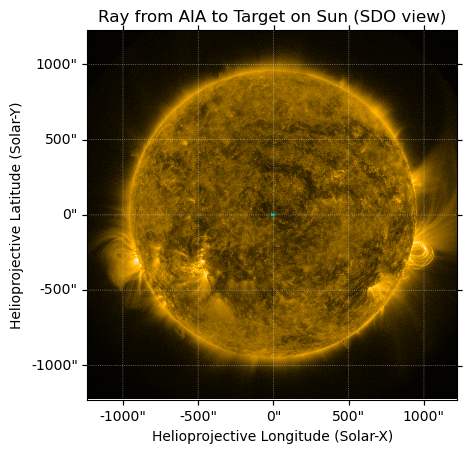

In [35]:

fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)

#aia_center_ray_coord = SkyCoord(723 * u.arcsec, -500 * u.arcsec, frame=my_map.coordinate_frame)
#aia_flare_ray_coord =
ax.plot_coord(los.transform_to(hpj_frame), color='r', lw=2)
ax.plot_coord(los1.transform_to(hpj_frame), color='c', lw=2)
aia_map.plot(axes=ax)
# ax.plot_coord(aia_coord, color='r', marker='o')

ax.set_title("Ray from AIA to Target on Sun (SDO view)")
plt.show()

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


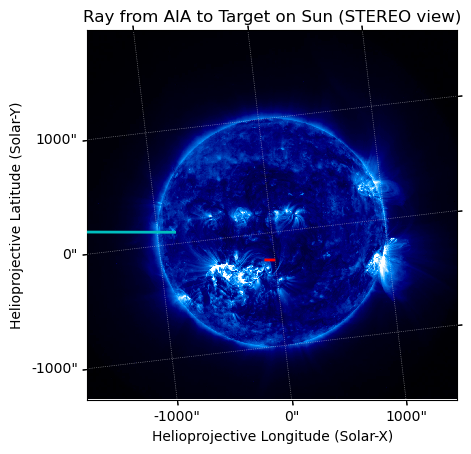

In [36]:
"""
STEREO map can be cropped to it's original extents
"""

fig = plt.figure()
ax = fig.add_subplot(projection=stereo_map)

ax.plot_coord(los.transform_to(hpj_coord), color='r', lw=2)
ax.plot_coord(los1.transform_to(hpj_coord), color='c', lw=2)

# To see full ray, swap line below with ax.plot_coord
stereo_map.plot(axes=ax)

ax.set_title("Ray from AIA to Target on Sun (STEREO view)")
plt.show()